In [3]:
import qiskit
import cirq
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler import passes
from qiskit.circuit import library
from qiskit import algorithms
from qiskit.circuit import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


**Generate and analyze some circuit instances**

In [2]:
################################################
# Original CCX gate
################################################
qc = QuantumCircuit(3)
qc.toffoli(0, 1, 2)
qc = qc.decompose()
qc.draw()
# qc.qasm(filename='./demos/ccx.qasm')
# qc.qasm(filename='./buildingblocks/ccx.qasm')


┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In [3]:
################################################
# CCX(0,1,2) with linear connectivity
################################################
connectivity = [[0, 1], [1, 2]]
qc = QuantumCircuit(3)
qc.ccx(0, 1, 2)
manager = PassManager([
    passes.Unroller(['h', 's', 't', 'sdg', 'tdg', 'cx']),
    passes.SabreSwap(CouplingMap(connectivity)),
    passes.Unroller(['h', 's', 't', 'sdg', 'tdg', 'cx']),
])
qc = manager.run(qc)
qc.draw()
# qc.qasm(filename='./demos/ccx012.qasm')


┌───┐                                    ┌───┐           »
q_0: ─────────────■───┤ X ├──■─────────────────────────────■───┤ T ├───────────»
                ┌─┴─┐ └─┬─┘┌─┴─┐               ┌───┐     ┌─┴─┐┌┴───┴┐┌───┐┌───┐»
q_1: ───────■───┤ X ├───■──┤ X ├──■─────────■──┤ X ├──■──┤ X ├┤ Tdg ├┤ X ├┤ T ├»
     ┌───┐┌─┴─┐┌┴───┴┐     └───┘┌─┴─┐┌───┐┌─┴─┐└─┬─┘┌─┴─┐└───┘└─────┘└─┬─┘└───┘»
q_2: ┤ H ├┤ X ├┤ Tdg ├──────────┤ X ├┤ T ├┤ X ├──■──┤ X ├──────────────■───────»
     └───┘└───┘└─────┘          └───┘└───┘└───┘     └───┘                      »
«               ┌───┐                      
«q_0: ───────■──┤ X ├──■───────────────────
«     ┌───┐┌─┴─┐└─┬─┘┌─┴─┐┌───┐┌─────┐┌───┐
«q_1: ┤ H ├┤ X ├──■──┤ X ├┤ X ├┤ Tdg ├┤ X ├
«     └───┘└───┘     └───┘└─┬─┘└┬───┬┘└─┬─┘
«q_2: ──────────────────────■───┤ T ├───■──
«                               └───┘

In [4]:
################################################
# CCX(0,2,1) with linear connectivity
################################################
connectivity = [[0, 1], [1, 2]]
qc = QuantumCircuit(3)
qc.ccx(0, 2, 1)
manager = PassManager([
    passes.Unroller(['h', 's', 't', 'sdg', 'tdg', 'cx']),
    passes.SabreSwap(CouplingMap(connectivity)),
    passes.Unroller(['h', 's', 't', 'sdg', 'tdg', 'cx']),
])
qc = manager.run(qc)
qc.draw()
# qc.qasm(filename='./demos/ccx021.qasm')


┌───┐          »
q_0: ───────────────────■─────────────────────■──────────────■──┤ X ├──■───────»
     ┌───┐┌───┐┌─────┐┌─┴─┐┌───┐┌───┐┌─────┐┌─┴─┐┌───┐┌───┐┌─┴─┐└─┬─┘┌─┴─┐     »
q_1: ┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ H ├┤ X ├──■──┤ X ├──■──»
     └───┘└─┬─┘└─────┘└───┘└───┘└─┬─┘└┬───┬┘└───┘└───┘└───┘└───┘     └───┘┌─┴─┐»
q_2: ───────■─────────────────────■───┤ T ├───────────────────────────────┤ X ├»
                                      └───┘                               └───┘»
«                 
«q_0: ────────────
«      ┌───┐      
«q_1: ─┤ T ├───■──
«     ┌┴───┴┐┌─┴─┐
«q_2: ┤ Tdg ├┤ X ├
«     └─────┘└───┘

In [5]:
################################################
# CSWAP
################################################
qc = QuantumCircuit(3)
qc.cswap(0, 1, 2)
qc = qc.decompose().decompose()
qc.draw()
# qc.qasm(filename='./buildingblocks/cswap.qasm')


┌───┐           
q_0: ────────────────────────■─────────────────────■────■───┤ T ├───■───────
     ┌───┐                   │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐┌───┐
q_1: ┤ X ├───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ Tdg ├┤ X ├┤ X ├
     └─┬─┘┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘└─┬─┘
q_2: ──■──┤ H ├┤ X ├┤ Tdg ├┤ X ├┤ T ├┤ X ├┤ Tdg ├┤ X ├┤ T ├─┤ H ├────────■──
          └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

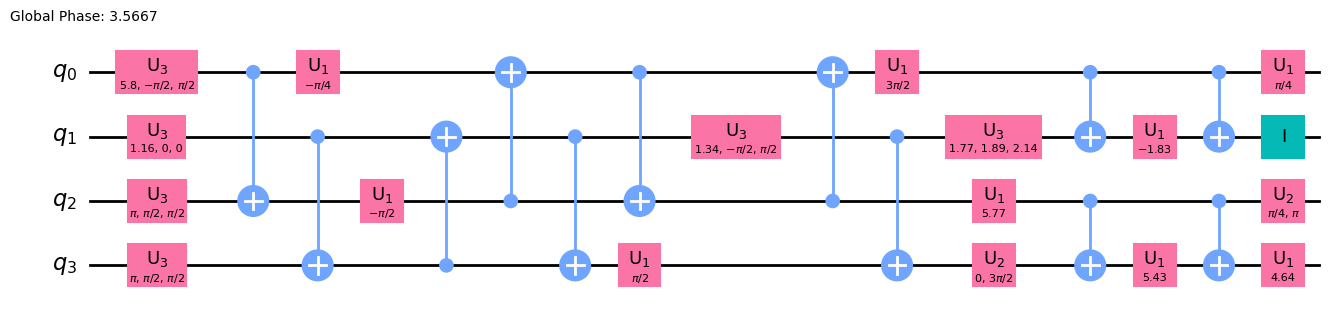

In [18]:
################################################
# random circuit (n=4)
################################################
qc = random.random_circuit(4, depth=8, max_operands=2, seed=123)
manager = PassManager([
    passes.Unroller(['id', 'u3', 'cx']),
    passes.Optimize1qGates(),
])
qc = manager.run(qc)
qc.decompose('swap').draw('mpl')
# qc.qasm(filename='./demos/rand4.qasm')


In [17]:
print(qc.qasm())


OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
rx(5.8015477) q[0];
ry(1.1584423) q[1];
y q[2];
cx q[0],q[2];
tdg q[0];
sdg q[2];
swap q[2],q[0];
s q[0];
z q[0];
u1(5.7717371) q[2];
y q[3];
swap q[1],q[3];
rx(1.3431123) q[1];
z q[3];
cy q[1],q[3];
u3(1.769979,6.3437615,2.137258) q[1];
crz(3.664595) q[0],q[1];
t q[0];
id q[1];
h q[3];
rzz(5.4330091) q[2],q[3];
h q[2];
t q[2];
u1(1.49481) q[3];
z q[3];



In [14]:
print(qc.qasm())


OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
u3(5.8015477,-pi/2,pi/2) q[0];
u3(1.1584423,0,0) q[1];
u3(pi,pi/2,pi/2) q[2];
cx q[0],q[2];
u1(-pi/4) q[0];
u1(-pi/2) q[2];
cx q[2],q[0];
cx q[0],q[2];
cx q[2],q[0];
u1(3*pi/2) q[0];
u1(5.7717371) q[2];
u3(pi,pi/2,pi/2) q[3];
cx q[1],q[3];
cx q[3],q[1];
cx q[1],q[3];
u3(1.3431123,-pi/2,pi/2) q[1];
u1(pi/2) q[3];
cx q[1],q[3];
u3(1.769979,1.8928737,2.137258) q[1];
cx q[0],q[1];
u1(-1.8322975) q[1];
cx q[0],q[1];
u1(pi/4) q[0];
id q[1];
u2(0,3*pi/2) q[3];
cx q[2],q[3];
u1(5.4330091) q[3];
cx q[2],q[3];
u2(pi/4,pi) q[2];
u1(4.6364026) q[3];



In [7]:
################################################
# CDKM Ripple Adder
################################################
# for m in [10, 20, 30]:
#     qc = library.CDKMRippleCarryAdder(m).decompose().decompose().decompose('ccx')
#     qc.qasm(filename='./buildingblocks/cdkm_adder_{}.qasm'.format(m))


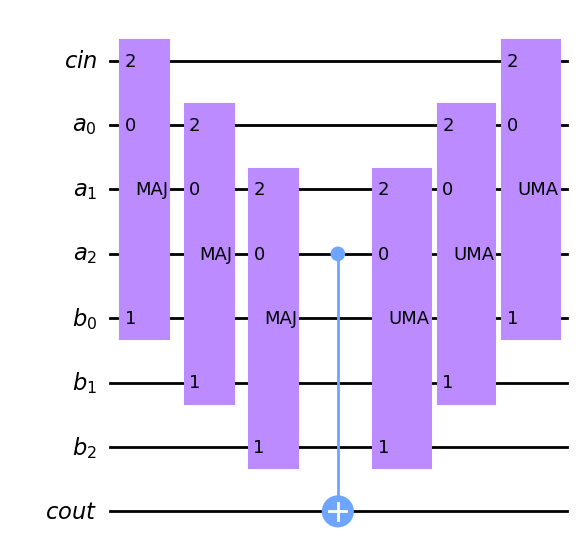

In [9]:
qc = library.CDKMRippleCarryAdder(3).decompose()
qc.draw('mpl')


In [36]:
import cirq


def MAJ(q0, q1, q2):
    return [cirq.CX(q2, q1), cirq.CX(q2, q0), cirq.CCX(q0, q1, q2)]


def UMA(q0, q1, q2):
    return [cirq.CCX(q0, q1, q2), cirq.CX(q2, q0), cirq.CX(q2, q1)]

for m in [10, 20, 30]:
    n = 2 * m + 2
    a = cirq.NamedQubit.range(m, prefix='a')
    b = cirq.NamedQubit.range(m, prefix='b')
    cin = cirq.NamedQubit('cin')
    cout = cirq.NamedQubit('cout')

    circ = cirq.Circuit()
    for i in range(m):
        if i == 0:
            circ.append(MAJ(cin, b[i], a[i]))
        else:
            circ.append(MAJ(a[i-1], b[i], a[i]))
    circ.append(cirq.CX(a[m-1], cout))
    for i in range(m-1, -1, -1):
        if i == 0:
            circ.append(UMA(cin, b[i], a[i]))
        else:
            circ.append(UMA(a[i-1], b[i], a[i]))
    qc = QuantumCircuit.from_qasm_str(circ.to_qasm()).decompose('ccx')
    qc.qasm(filename='./buildingblocks/cdkm_adder_{}.qasm'.format(m))


In [28]:
QuantumCircuit.from_qasm_str(circ.to_qasm()).draw()


┌───┐┌───┐                                   ┌───┐»
q_0: ──■──────────────■──┤ X ├┤ X ├──■─────────────────────────────■──┤ X ├»
       │              │  └─┬─┘└─┬─┘┌─┴─┐┌───┐               ┌───┐┌─┴─┐└─┬─┘»
q_1: ──┼────■─────────┼────┼────■──┤ X ├┤ X ├──■─────────■──┤ X ├┤ X ├──■──»
       │    │         │    │       └─┬─┘└─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘└─┬─┘     »
q_2: ──┼────┼────■────┼────┼─────────┼────■──┤ X ├──■──┤ X ├──■────┼────■──»
     ┌─┴─┐  │    │    │    │         │       └─┬─┘  │  └─┬─┘       │    │  »
q_3: ┤ X ├──┼────┼────┼────■─────────┼─────────┼────┼────┼─────────┼────┼──»
     └───┘┌─┴─┐  │    │    │         │         │    │    │         │    │  »
q_4: ─────┤ X ├──┼────┼────┼─────────■─────────┼────┼────┼─────────■────┼──»
          └───┘┌─┴─┐  │    │                   │    │    │            ┌─┴─┐»
q_5: ──────────┤ X ├──┼────┼───────────────────■────┼────■────────────┤ X ├»
               └───┘┌─┴─┐  │                        │                 └───┘»
q_6: ───────────────┤ X ├──■────────────────────────┼──────────────────────»
                    └───┘                         ┌─┴─┐                    »
q_7: ─────────────────────────────────────────────┤ X ├────────────────────»
                                                  └───┘                    »
«          ┌───┐          
«q_0: ─────┤ X ├──■────■──
«          └─┬─┘  │    │  
«q_1: ──■────┼────┼────┼──
«       │    │    │    │  
«q_2: ──┼────┼────┼────┼──
«       │    │    │  ┌─┴─┐
«q_3: ──┼────■────┼──┤ X ├
«     ┌─┴─┐  │    │  └───┘
«q_4: ┤ X ├──┼────┼───────
«     └───┘  │    │       
«q_5: ───────┼────┼───────
«            │  ┌─┴─┐     
«q_6: ───────■──┤ X ├─────
«               └───┘     
«q_7: ────────────────────
«

In [26]:
print(circ.to_qasm())


// Generated from Cirq v1.0.0

OPENQASM 2.0;
include "qelib1.inc";


// Qubits: [a0, a1, a2, b0, b1, b2, cin, cout]
qreg q[8];


cx q[0],q[3];
cx q[1],q[4];
cx q[2],q[5];
cx q[0],q[6];
ccx q[6],q[3],q[0];
cx q[1],q[0];
ccx q[0],q[4],q[1];
cx q[2],q[1];
ccx q[1],q[5],q[2];
cx q[2],q[7];
ccx q[1],q[5],q[2];
cx q[2],q[1];
cx q[2],q[5];
ccx q[0],q[4],q[1];
cx q[1],q[0];
cx q[1],q[4];
ccx q[6],q[3],q[0];
cx q[0],q[6];
cx q[0],q[3];



In [4]:
for i, qubit in enumerate(qc.qubits):
    

[Qubit(QuantumRegister(1, 'cin'), 0),
 Qubit(QuantumRegister(3, 'a'), 0),
 Qubit(QuantumRegister(3, 'a'), 1),
 Qubit(QuantumRegister(3, 'a'), 2),
 Qubit(QuantumRegister(3, 'b'), 0),
 Qubit(QuantumRegister(3, 'b'), 1),
 Qubit(QuantumRegister(3, 'b'), 2),
 Qubit(QuantumRegister(1, 'cout'), 0)]

In [11]:
qc.qubits[0].register.name = '1111'


/tmp/ipykernel_14777/2032686549.py:1: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  qc.qubits[0].register.name = '1111'


AttributeError: can't set attribute

In [9]:
################################################
# QAOA algorithm (n=8, 16, 32, 64)
################################################
# np.random.seed(123)
# for n in [8, 16, 32, 64]:
#     g = nx.connected_watts_strogatz_graph(n, 4, 0.5, seed=123)
#     edges = list(g.edges)
#     n = g.number_of_nodes()  # number of qubits
#     l = n  # number of layers
#     qc = QuantumCircuit(n)
#     # superposition layer
#     qc.h(range(n))

#     for _ in range(l):
#         # U_D layer
#         for i, j in edges:
#             qc.cx(i, j)
#             qc.rz(np.random.uniform(-np.pi, np.pi), j)
#             qc.cx(i, j)
#         # U_B layer
#         for i in range(n):
#             qc.rx(np.random.uniform(-np.pi, np.pi), i)

#     qc.qasm(filename='applications/qaoa_{}.qasm'.format(n))

np.random.seed(123)
for n in [8, 16, 32, 64]:
    g = nx.connected_watts_strogatz_graph(n, 4, 0.5, seed=123)
    edges = list(g.edges)
    n = g.number_of_nodes()  # number of qubits
    l = n  # number of layers
    qubits = cirq.LineQubit.range(n)
    circ = cirq.Circuit()
    
    # superposition layer
    circ.append(cirq.H.on_each(*qubits))

    for _ in range(l):
        # U_D layer
        for i, j in edges:
            circ.append([
                cirq.CX(qubits[i], qubits[j]),
                cirq.Rz(rads=np.random.uniform(-np.pi, np.pi)).on(qubits[j]),
                cirq.CX(qubits[i], qubits[j]),
            ])
        # U_B layer
        for i in range(n):
            circ.append(cirq.Rx(rads=np.random.uniform(-np.pi, np.pi)).on(qubits[i]))

    with open('applications/qaoa_{}.qasm'.format(n), 'w') as f:
        f.write(circ.to_qasm())


In [45]:
################################################
# Ising model (n=8, 16, 32, 64)
################################################



In [65]:
type(cirq.X)


cirq.ops.pauli_gates._PauliX

In [66]:
type(cirq.X.on(cirq.LineQubit(0)))


cirq.ops.pauli_string.SingleQubitPauliStringGateOperation

In [68]:
cirq.mixture(cirq.X)


((1.0,
  array([[0.+0.j, 1.+0.j],
         [1.+0.j, 0.+0.j]])),)

In [73]:
cirq.rx(rads=np.pi).on(cirq.LineQubit(0))


cirq.Rx(rads=3.141592653589793).on(cirq.LineQubit(0))